# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:
https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=hypertension_data.csv
## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

diabetes = pd.read_csv('diabetes.csv')
stroke = pd.read_csv('stroke.csv')

In [2]:
diabetes.head()

,Age_Group,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
stroke.head()

,Sex,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_type,Avg_Glucose_Level,BMI,Smoker,Stroke,Age_Group
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1,9
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1,5
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1,9
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1,5
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1,13


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

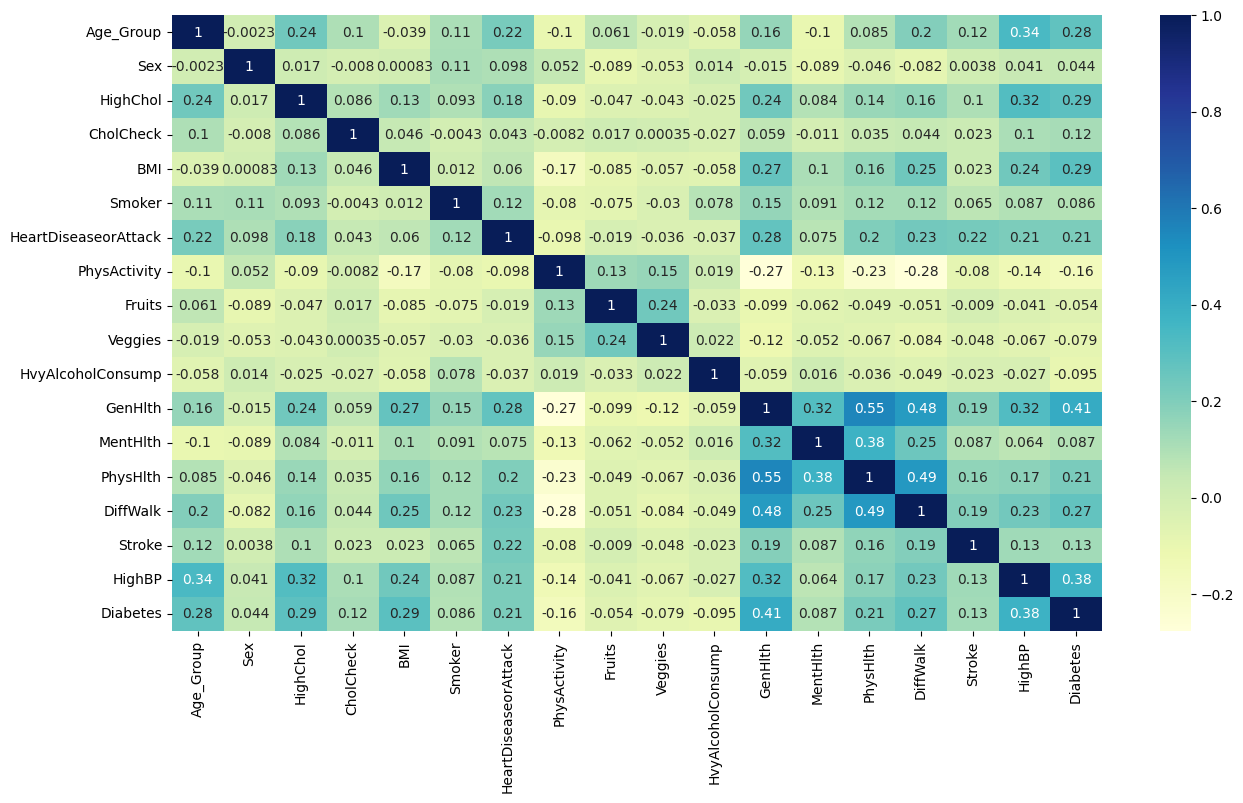

In [6]:
plt.figure(figsize = (15,8))
sb.heatmap(diabetes.corr(), cmap="YlGnBu", annot = True)
plt.show()

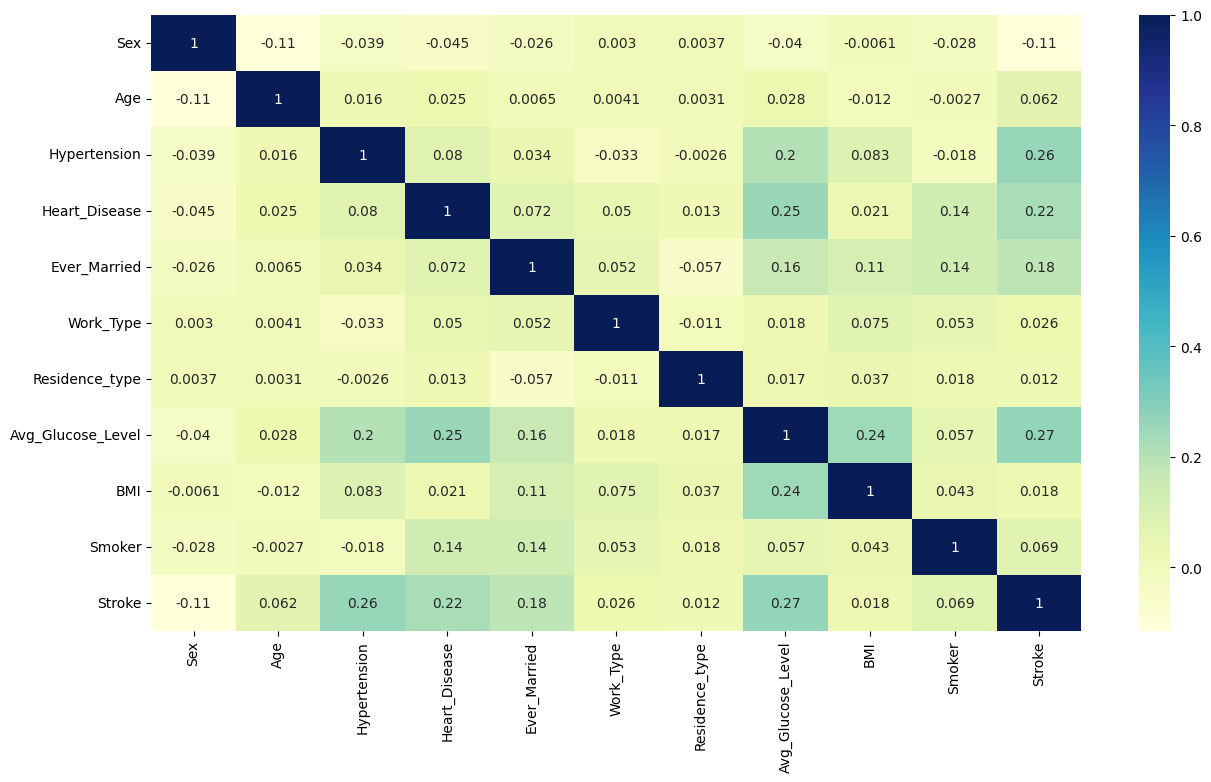

In [8]:
plt.figure(figsize = (15,8))
sb.heatmap(stroke.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [39]:
X = stroke['Avg_Glucose_Level']
y = stroke['Stroke']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [41]:
X_train

30920    107.45
29252     92.49
8340     203.87
19647     72.96
1612     221.58
          ...  
16304    214.09
79        64.17
12119     86.23
14147    111.81
38408     95.32
Name: Avg_Glucose_Level, Length: 28594, dtype: float64

In [42]:
y_train

30920    0
29252    0
8340     1
19647    1
1612     1
        ..
16304    1
79       1
12119    1
14147    1
38408    0
Name: Stroke, Length: 28594, dtype: int64

In [43]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [44]:
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                0.218788
Avg_Glucose_Level    0.002300
dtype: float64

In [45]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Stroke   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2152.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:54:50   Log-Likelihood:                -19716.
No. Observations:               28594   AIC:                         3.944e+04
Df Residuals:                   28592   BIC:                         3.945e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2188      0.007     32.739      0.000       0.206       0.232
Avg_Glucose_Level     0.0023   4.96e-05     46.389      0.000       0.002       0.002
==============================================================================
Omnibus:                   119977.482   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3559.948
Skew:                           0.050   Prob(JB):                         0.00
Kurtosis:                       1.274   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

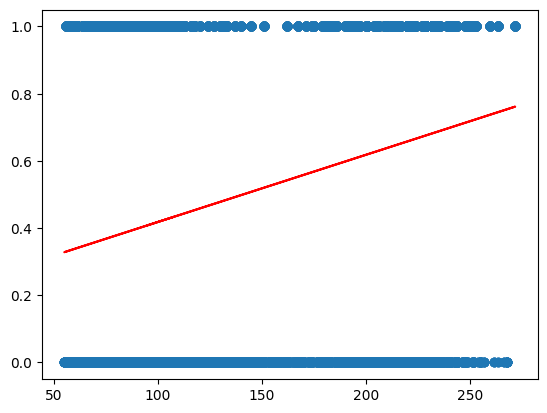

In [27]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.218 + 0.002 *X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [28]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

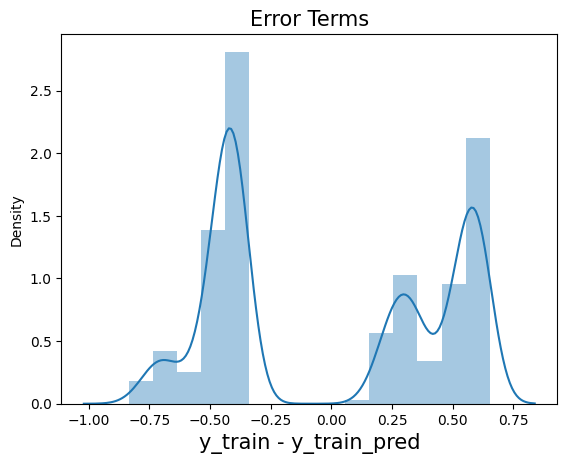

In [48]:
ig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.070
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? No, it doesn't. It has two separate distplot.